In [47]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz
%matplotlib inline

In [48]:
stats = pd.read_csv("cville_summer_all_stats.csv", index_col = 0)
stats.head()

,min,max,mean,count,median,nodata,masked_count,spatial_unit,GEOID,file,prop_nodata,entityId,displayId,Date Acquired,Start Time,Stop Time,Day/Night Indicator,Land Cloud Cover,Sun Elevation L0RA,Sun Azimuth L0RA
0,75.939478,133.926188,93.442535,29263,92.071165,294.0,22262,counties,51540,LC08_L2SP_016033_20170813_20200903_02_T1,0.009947,LC80160332017225LGN00,LC08_L2SP_016033_20170813_20200903_02_T1,2017/08/13,2017:225:15:52:24.3350750,2017:225:15:52:56.1050730,DAY,9.57,59.125918,136.403979
1,84.220657,111.863552,96.460024,2419,96.913133,0.0,3170,tracts,51540001000,LC08_L2SP_016033_20170813_20200903_02_T1,0.000000,LC80160332017225LGN00,LC08_L2SP_016033_20170813_20200903_02_T1,2017/08/13,2017:225:15:52:24.3350750,2017:225:15:52:56.1050730,DAY,9.57,59.125918,136.403979
2,88.761155,110.996059,98.622134,1342,98.189763,0.0,1258,tracts,51540000201,LC08_L2SP_016033_20170813_20200903_02_T1,0.000000,LC80160332017225LGN00,LC08_L2SP_016033_20170813_20200903_02_T1,2017/08/13,2017:225:15:52:24.3350750,2017:225:15:52:56.1050730,DAY,9.57,59.125918,136.403979
3,77.459130,101.687423,85.536043,3138,85.063541,282.0,2462,tracts,51540000502,LC08_L2SP_016033_20170813_20200903_02_T1,0.082456,LC80160332017225LGN00,LC08_L2SP_016033_20170813_20200903_02_T1,2017/08/13,2017:225:15:52:24.3350750,2017:225:15:52:56.1050730,DAY,9.57,59.125918,136.403979
4,93.277043,109.820943,102.455469,1074,102.148856,0.0,915,tracts,51540000202,LC08_L2SP_016033_20170813_20200903_02_T1,0.000000,LC80160332017225LGN00,LC08_L2SP_016033_20170813_20200903_02_T1,2017/08/13,2017:225:15:52:24.3350750,2017:225:15:52:56.1050730,DAY,9.57,59.125918,136.403979


In [49]:
for col in ['Start Time', 'Stop Time']:
    stats[col] = stats[col].apply(lambda x: datetime.strptime(x[:-1], '%Y:%j:%H:%M:%S.%f'))
    stats[col] = stats[col].apply(lambda x: x - timedelta(hours=4))

In [70]:
stats['hour'] = stats['Start Time'].apply(lambda x: x.hour)
stats['year'] = stats['Start Time'].apply(lambda x: x.year)
stats['temp_diff'] = stats.apply(lambda x: x['max'] - x['min'], axis = 1)

In [71]:
# GEOID to str
stats.GEOID = stats.GEOID.apply(lambda x: str(x))

In [72]:
# read in cville spatial data 
cville_sp = {}
for sp in ['counties', 'tracts', 'blkgps', 'blocks']:
    gdf = gpd.read_file('../spatial_units/data/cville_{sp}.shp'.format(sp = sp))
    gdf = gdf[gdf.COUNTYFP == "540"]
    cville_sp[sp] = gdf

In [73]:
cville = {}
for key in cville_sp:
    cville[key] = pd.merge(cville_sp[key][["GEOID", "geometry"]], stats, left_on = "GEOID", right_on = "GEOID", how = "left")

In [74]:
displayIds = cville['counties'].displayId.tolist()
displayIds

['LC08_L2SP_016033_20170813_20200903_02_T1',
 'LC08_L2SP_016033_20180629_20200831_02_T1',
 'LC08_L2SP_016034_20140618_20200911_02_T1',
 'LC08_L2SP_016034_20140704_20200911_02_T1',
 'LC08_L2SP_016034_20140922_20200910_02_T1',
 'LC08_L2SP_016034_20150707_20200909_02_T1',
 'LC08_L2SP_016034_20160826_20200906_02_T1',
 'LC08_L2SP_016034_20170610_20201015_02_T1',
 'LC08_L2SP_016034_20170930_20200903_02_T1',
 'LC08_L2SP_016034_20190702_20200827_02_T1',
 'LC08_L2SP_016034_20190920_20200826_02_T1',
 'LC08_L2SP_016034_20200720_20210330_02_T1',
 'LC08_L2SP_016034_20200906_20200918_02_T1',
 'LC08_L2SP_016033_20210723_20210729_02_T1',
 'LC08_L2SP_016034_20200704_20200913_02_T1',
 'LC08_L2SP_016034_20210605_20210614_02_T1',
 'LC08_L2SP_016034_20200922_20201005_02_T1']

In [171]:
def plot_region(data, region, displayId, stat, _min = None, _max = None):
    f, ax = plt.subplots(figsize=(8,8))
    data[region][data[region].displayId == displayId].plot(stat, cmap = 'inferno', legend = True, vmin = _min, vmax = _max, ax=ax)
    ax.axis('off')
    plt.savefig('20200704_cville_city.png', transparent = True)

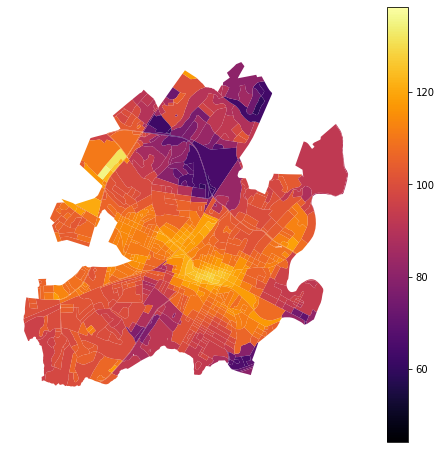

In [172]:
plot_region(cville, 'blocks', "LC08_L2SP_016034_20200704_20200913_02_T1", "median", _min=_min, _max=_max)

In [77]:
max(cville['blocks']['median'])

138.442075628

In [91]:
# get list of displayIds in chronological order
displayIds = cville['counties'].sort_values(by = 'Start Time', ascending = True).displayId.tolist()
displayIds

['LC08_L2SP_016034_20140618_20200911_02_T1',
 'LC08_L2SP_016034_20140704_20200911_02_T1',
 'LC08_L2SP_016034_20140922_20200910_02_T1',
 'LC08_L2SP_016034_20150707_20200909_02_T1',
 'LC08_L2SP_016034_20160826_20200906_02_T1',
 'LC08_L2SP_016034_20170610_20201015_02_T1',
 'LC08_L2SP_016033_20170813_20200903_02_T1',
 'LC08_L2SP_016034_20170930_20200903_02_T1',
 'LC08_L2SP_016033_20180629_20200831_02_T1',
 'LC08_L2SP_016034_20190702_20200827_02_T1',
 'LC08_L2SP_016034_20190920_20200826_02_T1',
 'LC08_L2SP_016034_20200704_20200913_02_T1',
 'LC08_L2SP_016034_20200720_20210330_02_T1',
 'LC08_L2SP_016034_20200906_20200918_02_T1',
 'LC08_L2SP_016034_20200922_20201005_02_T1',
 'LC08_L2SP_016034_20210605_20210614_02_T1',
 'LC08_L2SP_016033_20210723_20210729_02_T1']

In [92]:
len(displayIds)

17

In [154]:
_min = min(cville['blocks']['median'])
_max = max(cville['blocks']['median'])

In [169]:
_min, _max

(44.2544329040001, 138.442075628)

In [162]:
displayIds

['LC08_L2SP_016034_20140618_20200911_02_T1',
 'LC08_L2SP_016034_20140704_20200911_02_T1',
 'LC08_L2SP_016034_20140922_20200910_02_T1',
 'LC08_L2SP_016034_20150707_20200909_02_T1',
 'LC08_L2SP_016034_20160826_20200906_02_T1',
 'LC08_L2SP_016034_20170610_20201015_02_T1',
 'LC08_L2SP_016033_20170813_20200903_02_T1',
 'LC08_L2SP_016034_20170930_20200903_02_T1',
 'LC08_L2SP_016033_20180629_20200831_02_T1',
 'LC08_L2SP_016034_20190702_20200827_02_T1',
 'LC08_L2SP_016034_20190920_20200826_02_T1',
 'LC08_L2SP_016034_20200704_20200913_02_T1',
 'LC08_L2SP_016034_20200720_20210330_02_T1',
 'LC08_L2SP_016034_20200906_20200918_02_T1',
 'LC08_L2SP_016034_20200922_20201005_02_T1',
 'LC08_L2SP_016034_20210605_20210614_02_T1',
 'LC08_L2SP_016033_20210723_20210729_02_T1']

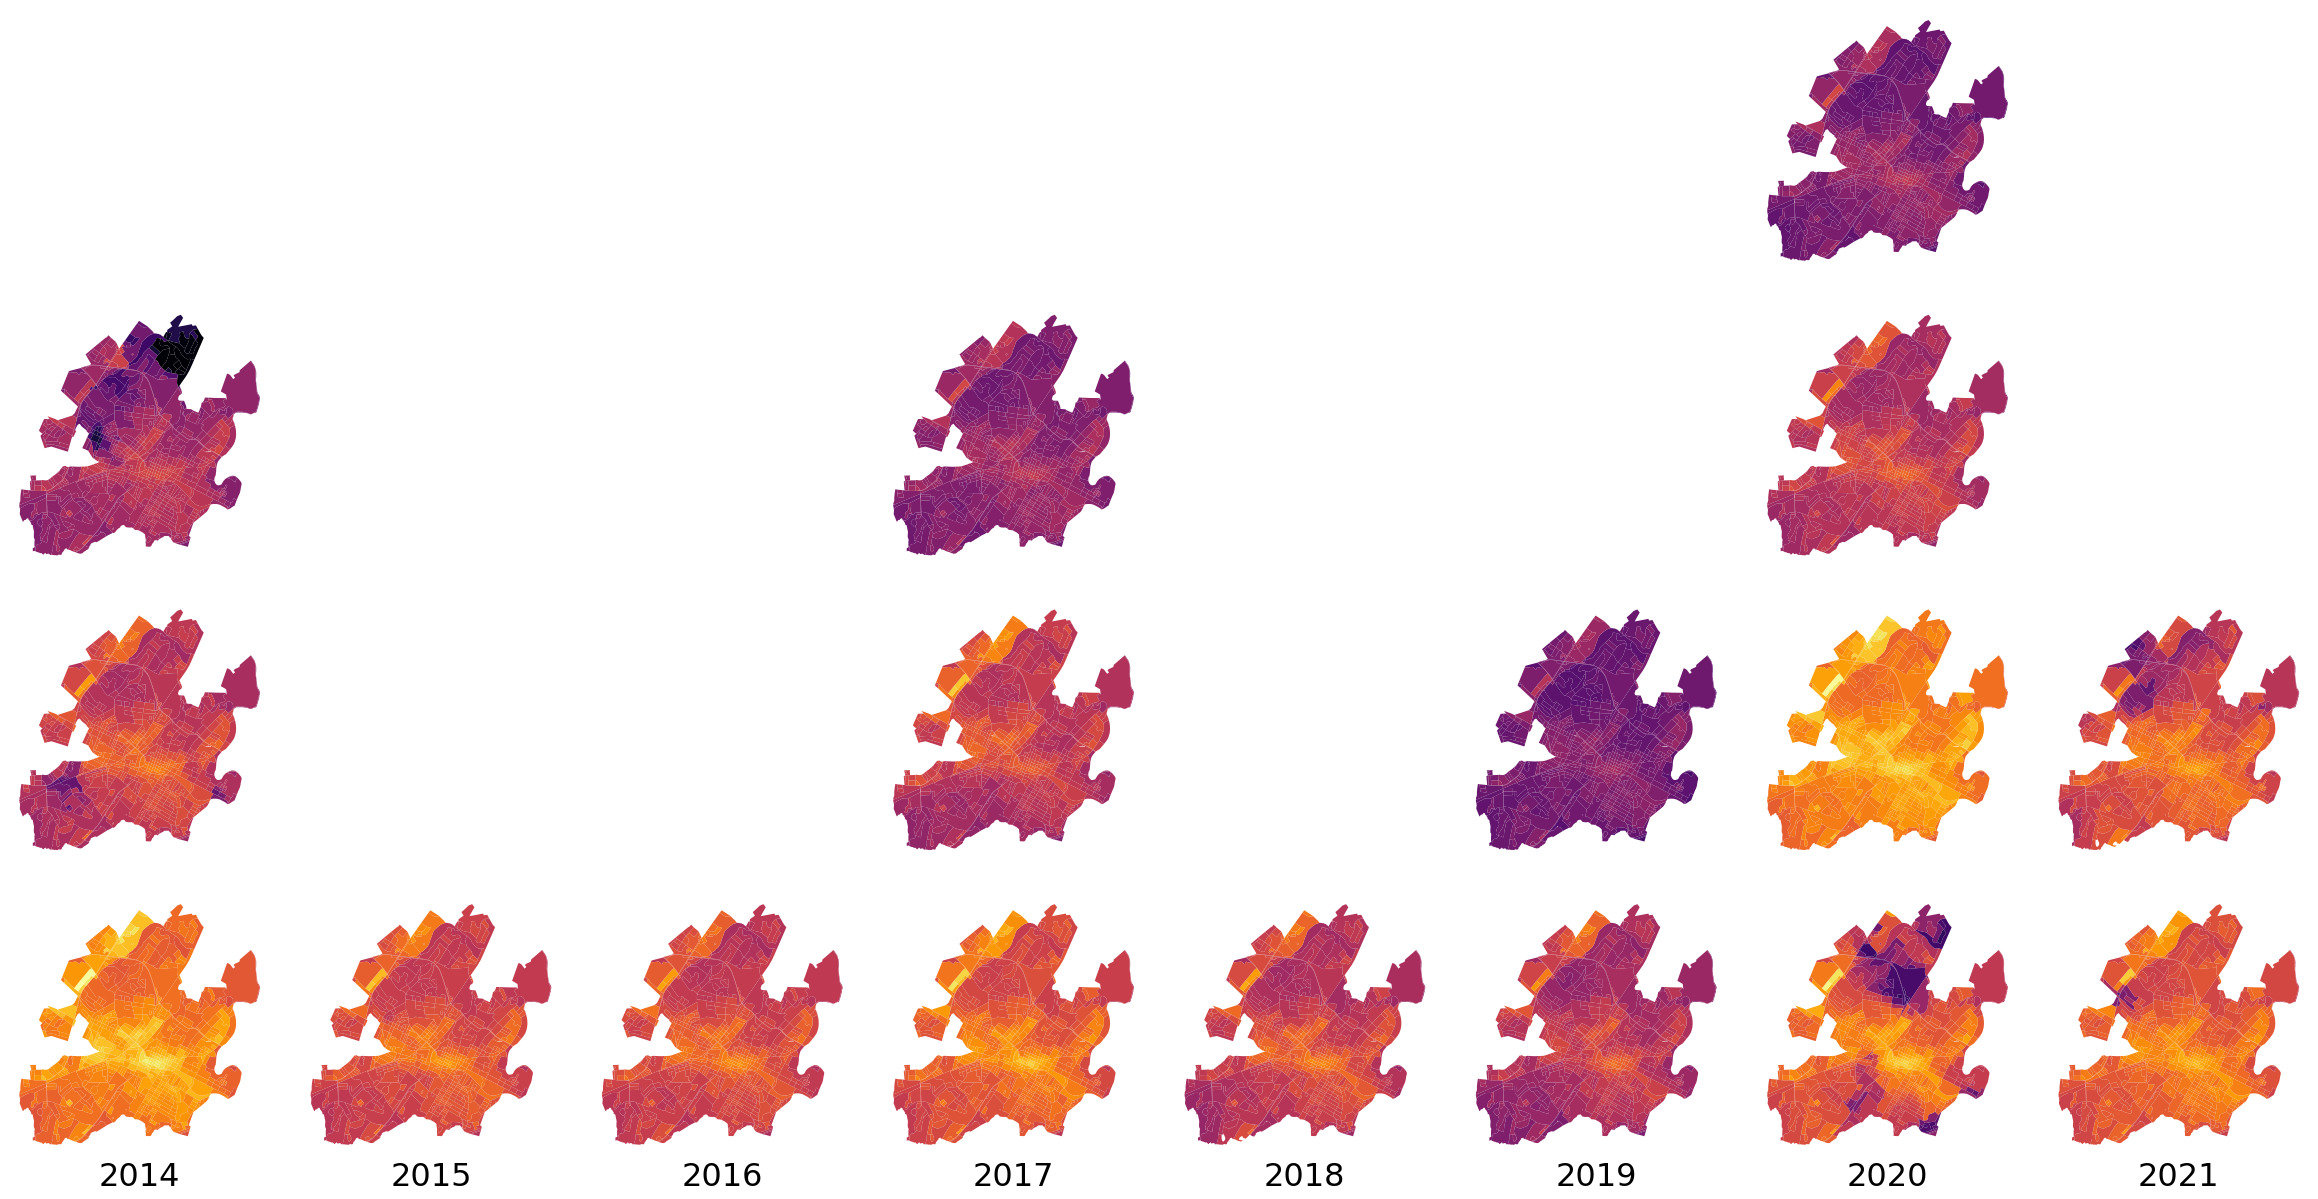

In [168]:
stat = "median"
year = 2014
fig, axes = plt.subplots(nrows = 4, ncols = 8, figsize=(40,20))
row = 3
col = 0
for _id in displayIds:
    data = cville['blocks'][cville['blocks'].displayId == _id]
    if data.iloc[0].year > year:
        year = data.iloc[0].year
        col += 1
        row = 3
    
    if row == 3:
        axes[row, col].set_xlabel(str(year), fontsize=32)

    data.plot(stat, vmin = _min, vmax = _max, ax = axes[row, col], cmap = 'inferno')
    row -= 1
    
for row in range(4):
    for col in range(8):
        if row != 3:
            axes[row, col].axis('off')
        else:
            ax = axes[row, col]
            ax.spines.right.set_visible(False)
            ax.spines.left.set_visible(False)
            ax.spines.top.set_visible(False)
            ax.spines.bottom.set_visible(False)
            ax.set_xticks([])
            ax.set_yticks([])

# fig.tight_layout()
plt.subplots_adjust(left = 0.1, 
                   bottom = 0.1,
                   right = 0.9,
                   top = 0.9, 
                   wspace = 0.1,
                   hspace = 0.1)
plt.savefig('cville_blocks_overtime.png', transparent = True)

In [143]:
# for each scene compute the temperature differential between the highest median temp in a block and lowest median temp in a block
temp_diff = []
for _id in displayIds:
    data = cville['blocks'][cville['blocks'].displayId == _id]
    start = data.iloc[0]['Start Time']
    _max = max(data['median'])
    _min = min(data['median'])
    temp_diff.append({'displayId': _id, 'med_temp_diff': _max - _min, 'Start Time': start})
tmp_df = pd.DataFrame(temp_diff)
tmp_df.head()

,displayId,med_temp_diff,Start Time
0,LC08_L2SP_016034_20140618_20200911_02_T1,43.260854,2014-06-18 11:52:28.666628
1,LC08_L2SP_016034_20140704_20200911_02_T1,52.363383,2014-07-04 11:52:34.287747
2,LC08_L2SP_016034_20140922_20200910_02_T1,55.375000,2014-09-22 11:52:51.517349
3,LC08_L2SP_016034_20150707_20200909_02_T1,38.643451,2015-07-07 11:52:14.384256
4,LC08_L2SP_016034_20160826_20200906_02_T1,33.706121,2016-08-26 11:52:54.966798


In [144]:
tmp_df.head(20)

,displayId,med_temp_diff,Start Time
0,LC08_L2SP_016034_20140618_20200911_02_T1,43.260854,2014-06-18 11:52:28.666628
1,LC08_L2SP_016034_20140704_20200911_02_T1,52.363383,2014-07-04 11:52:34.287747
2,LC08_L2SP_016034_20140922_20200910_02_T1,55.375000,2014-09-22 11:52:51.517349
3,LC08_L2SP_016034_20150707_20200909_02_T1,38.643451,2015-07-07 11:52:14.384256
4,LC08_L2SP_016034_20160826_20200906_02_T1,33.706121,2016-08-26 11:52:54.966798
5,LC08_L2SP_016034_20170610_20201015_02_T1,44.835877,2017-06-10 11:52:26.408178
6,LC08_L2SP_016033_20170813_20200903_02_T1,49.585558,2017-08-13 11:52:24.335075
7,LC08_L2SP_016034_20170930_20200903_02_T1,26.870764,2017-09-30 11:52:59.745259
8,LC08_L2SP_016033_20180629_20200831_02_T1,40.461495,2018-06-29 11:51:24.434443
9,LC08_L2SP_016034_20190702_20200827_02_T1,39.757041,2019-07-02 11:52:40.403977


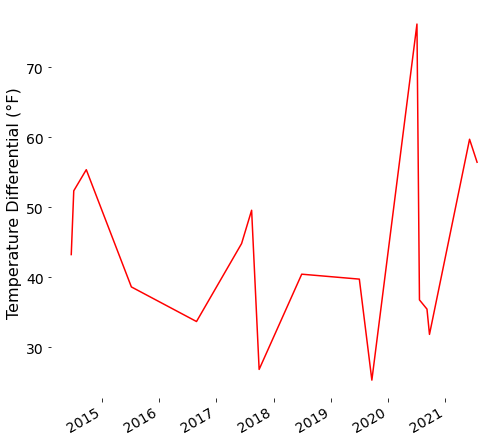

In [191]:
f, ax = plt.subplots(figsize=(8,8))
tmp_df.plot(y = 'med_temp_diff', x = 'Start Time', ax=ax, legend = False, color = "red")
ax.set_xlabel('')
ax.set_ylabel('Temperature Differential (°F)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
plt.savefig('med_temp_diff.png', transparent = True)

In [188]:
stats.head()

,min,max,mean,count,median,nodata,masked_count,spatial_unit,GEOID,file,...,Date Acquired,Start Time,Stop Time,Day/Night Indicator,Land Cloud Cover,Sun Elevation L0RA,Sun Azimuth L0RA,hour,year,temp_diff
0,75.939478,133.926188,93.442535,29263,92.071165,294.0,22262,counties,51540,LC08_L2SP_016033_20170813_20200903_02_T1,...,2017/08/13,2017-08-13 11:52:24.335075,2017-08-13 11:52:56.105073,DAY,9.57,59.125918,136.403979,11,2017,57.986709
1,84.220657,111.863552,96.460024,2419,96.913133,0.0,3170,tracts,51540001000,LC08_L2SP_016033_20170813_20200903_02_T1,...,2017/08/13,2017-08-13 11:52:24.335075,2017-08-13 11:52:56.105073,DAY,9.57,59.125918,136.403979,11,2017,27.642895
2,88.761155,110.996059,98.622134,1342,98.189763,0.0,1258,tracts,51540000201,LC08_L2SP_016033_20170813_20200903_02_T1,...,2017/08/13,2017-08-13 11:52:24.335075,2017-08-13 11:52:56.105073,DAY,9.57,59.125918,136.403979,11,2017,22.234904
3,77.459130,101.687423,85.536043,3138,85.063541,282.0,2462,tracts,51540000502,LC08_L2SP_016033_20170813_20200903_02_T1,...,2017/08/13,2017-08-13 11:52:24.335075,2017-08-13 11:52:56.105073,DAY,9.57,59.125918,136.403979,11,2017,24.228293
4,93.277043,109.820943,102.455469,1074,102.148856,0.0,915,tracts,51540000202,LC08_L2SP_016033_20170813_20200903_02_T1,...,2017/08/13,2017-08-13 11:52:24.335075,2017-08-13 11:52:56.105073,DAY,9.57,59.125918,136.403979,11,2017,16.543900


In [ ]:
f, ax = plt.subplots(figsize=(10,6))
tmp_df.plot(y = 'med_temp_diff', x = 'Start Time', ax=ax, legend = False, color = "red")
ax.set_xlabel('')
ax.set_ylabel('Temperature Differential (°F)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()